In [77]:
# !pip install fbprophet

# 1. Import Dependencies

In [78]:
import pandas as pd # Import pandas
from fbprophet import Prophet # Prophet modelling library
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. Load Data

In [79]:
df = pd.read_csv('/content/Data Analyst -- Case Study -- Data.csv')

In [80]:
df.head()

,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536


In [81]:
df.dtypes

warehouse       object
date            object
total_orders     int64
dtype: object

# 3. Apply Data Preprocessing

In [82]:
df ['date'] = pd.to_datetime(df['date'])


In [83]:
frame = df[df['warehouse'] == "EW1"].copy()
frame

,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536
...,...,...,...
85,EW1,2021-11-04,386
86,EW1,2021-11-05,375
87,EW1,2021-11-06,441
88,EW1,2021-11-07,421


In [84]:
frame.drop('warehouse', axis=1, inplace=True)

In [85]:
frame.columns = ['ds', 'y']

In [86]:
frame.head()

,ds,y
0,2021-08-10,455
1,2021-08-11,553
2,2021-08-12,569
3,2021-08-13,426
4,2021-08-14,536


# 4. Create Time Series Model

In [87]:
m = Prophet(interval_width=0.95) 

In [88]:
training_run = m.fit(frame)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 5. Evaluate Model

In [89]:
future = m.make_future_dataframe(periods=7, freq='D')


In [90]:
frame.tail(10)

,ds,y
80,2021-10-30,437
81,2021-10-31,494
82,2021-11-01,441
83,2021-11-02,398
84,2021-11-03,391
85,2021-11-04,386
86,2021-11-05,375
87,2021-11-06,441
88,2021-11-07,421
89,2021-11-08,526


In [91]:
forecast = m.predict(future)

In [92]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
77,2021-10-27,382.505566,-215.225017,837.076626,382.505566,382.505566,-59.886029,-59.886029,-59.886029,-59.886029,-59.886029,-59.886029,0.0,0.0,0.0,322.619536
78,2021-10-28,379.266533,-118.086502,857.913294,379.266533,379.266533,-5.544011,-5.544011,-5.544011,-5.544011,-5.544011,-5.544011,0.0,0.0,0.0,373.722522
79,2021-10-29,376.027501,-146.184547,856.086130,376.027501,376.027501,-30.213495,-30.213495,-30.213495,-30.213495,-30.213495,-30.213495,0.0,0.0,0.0,345.814005
80,2021-10-30,372.788468,-103.960189,894.873370,372.788468,372.788468,43.712438,43.712438,43.712438,43.712438,43.712438,43.712438,0.0,0.0,0.0,416.500906
81,2021-10-31,369.549436,-83.269500,947.759311,369.549436,369.549436,51.014848,51.014848,51.014848,51.014848,51.014848,51.014848,0.0,0.0,0.0,420.564284
82,2021-11-01,366.310403,-151.563310,917.124669,366.310403,366.310403,-3.562849,-3.562849,-3.562849,-3.562849,-3.562849,-3.562849,0.0,0.0,0.0,362.747554
83,2021-11-02,363.071371,-109.008136,877.917525,363.071371,363.071371,4.479098,4.479098,4.479098,4.479098,4.479098,4.479098,0.0,0.0,0.0,367.550469
84,2021-11-03,359.832338,-230.183960,793.308955,359.832338,359.832338,-59.886029,-59.886029,-59.886029,-59.886029,-59.886029,-59.886029,0.0,0.0,0.0,299.946309
85,2021-11-04,356.593306,-164.397577,868.012192,356.593306,356.593306,-5.544011,-5.544011,-5.544011,-5.544011,-5.544011,-5.544011,0.0,0.0,0.0,351.049295
86,2021-11-05,353.354274,-189.208844,845.352614,353.354274,353.354274,-30.213495,-30.213495,-30.213495,-30.213495,-30.213495,-30.213495,0.0,0.0,0.0,323.140778


In [93]:
# forecast.rename(columns = {'yhat':'predicted_orders'}, inplace = True)
forecast.tail(7)

            

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
90,2021-11-09,340.398144,-200.051139,881.144566,340.398139,340.398148,4.479098,4.479098,4.479098,4.479098,4.479098,4.479098,0.0,0.0,0.0,344.877242
91,2021-11-10,337.159111,-213.474100,789.689948,337.159096,337.159126,-59.886029,-59.886029,-59.886029,-59.886029,-59.886029,-59.886029,0.0,0.0,0.0,277.273082
92,2021-11-11,333.920079,-182.952227,814.577014,333.920047,333.920106,-5.544011,-5.544011,-5.544011,-5.544011,-5.544011,-5.544011,0.0,0.0,0.0,328.376068
93,2021-11-12,330.681047,-218.019754,878.340576,330.680999,330.681091,-30.213495,-30.213495,-30.213495,-30.213495,-30.213495,-30.213495,0.0,0.0,0.0,300.467551
94,2021-11-13,327.442014,-168.399513,870.593156,327.441949,327.442075,43.712438,43.712438,43.712438,43.712438,43.712438,43.712438,0.0,0.0,0.0,371.154452
95,2021-11-14,324.202982,-150.194097,880.074248,324.202897,324.203062,51.014848,51.014848,51.014848,51.014848,51.014848,51.014848,0.0,0.0,0.0,375.217830
96,2021-11-15,320.963949,-212.368208,844.970401,320.963845,320.964050,-3.562849,-3.562849,-3.562849,-3.562849,-3.562849,-3.562849,0.0,0.0,0.0,317.401100


In [94]:
# forecast['trend'] = 'actual_value'
# forecast[['ds','predicted_orders']].tail(7)

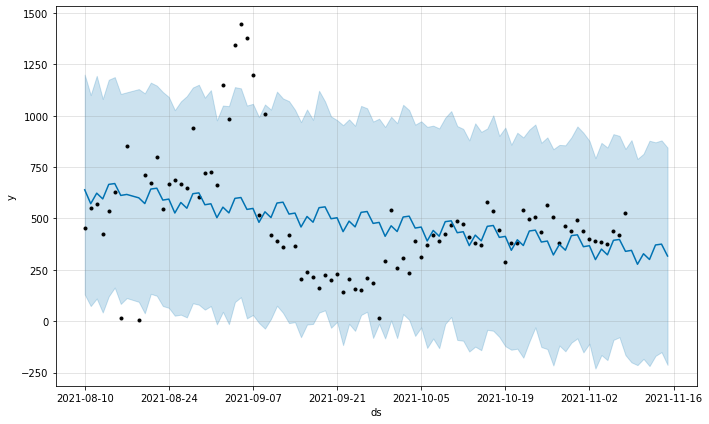

In [95]:
plot1 = m.plot(forecast, uncertainty=True)

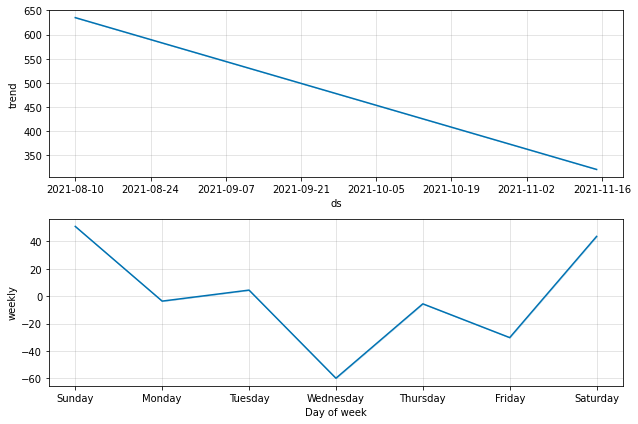

In [96]:
plot2 = m.plot_components(forecast)

# BONUS ROUND - Scaling Up

In [97]:
metric_df = forecast.set_index('ds')[['yhat']].join(frame.set_index('ds').y).reset_index()
metric_df.tail()
metric_df.dropna(inplace=True)

In [98]:
metric_df.tail()

,ds,yhat,y
85,2021-11-04,351.049295,386.0
86,2021-11-05,323.140778,375.0
87,2021-11-06,393.827679,441.0
88,2021-11-07,397.891057,421.0
89,2021-11-08,340.074327,526.0


In [99]:
print ("R squared value is:", r2_score(metric_df.y, metric_df.yhat) )

R squared value is: 0.10922915890525464
